In [1]:
# ! pip install kaggle
# ! kaggle competitions list
# ! unzip 
# ! pip install pandas numpy matplotlib seaborn

In [30]:
# imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [17]:
# loading data
train = pd.read_csv("../data/train.csv", index_col='id')
test = pd.read_csv("../data/test.csv", index_col='id')

In [18]:
print("train data dimensions: " ,train.shape)
print("test data dimensions: " ,test.shape)

train data dimensions:  (750000, 8)
test data dimensions:  (250000, 7)


### EDA

In [19]:
train.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,,,,,,,,
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 51.5+ MB


In [21]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,750000.0,41.420404,15.175049,20.0,28.0,40.0,52.0,79.0
Height,750000.0,174.697685,12.824496,126.0,164.0,174.0,185.0,222.0
Weight,750000.0,75.145668,13.982704,36.0,63.0,74.0,87.0,132.0
Duration,750000.0,15.421015,8.354095,1.0,8.0,15.0,23.0,30.0
Heart_Rate,750000.0,95.483995,9.449845,67.0,88.0,95.0,103.0,128.0
Body_Temp,750000.0,40.036253,0.779875,37.1,39.6,40.3,40.7,41.5
Calories,750000.0,88.282781,62.395349,1.0,34.0,77.0,136.0,314.0


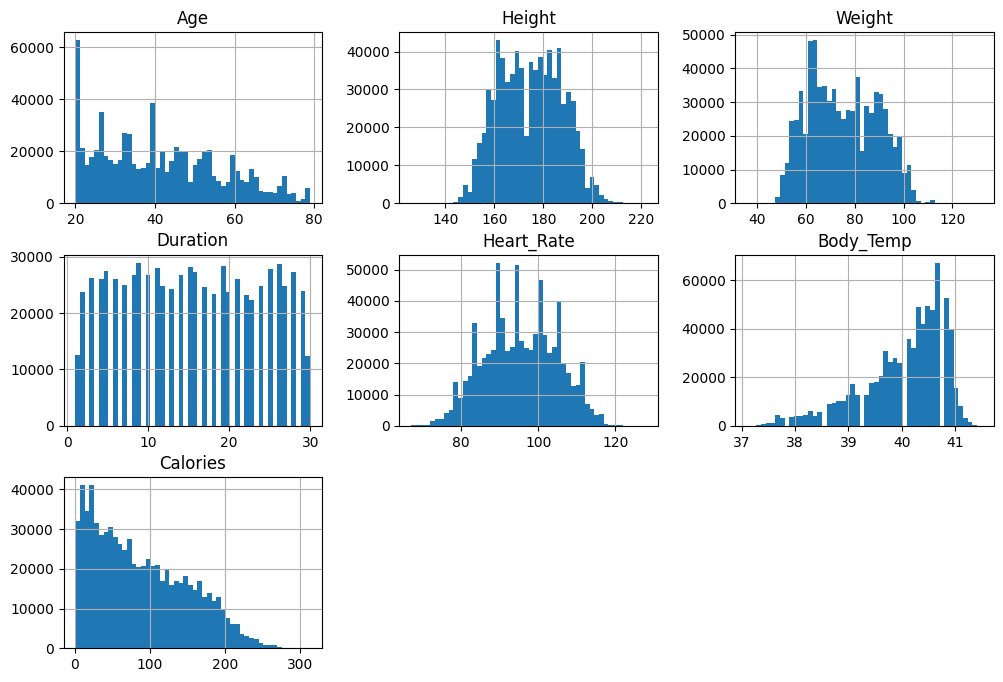

In [31]:
# looking at distribution
train.hist(figsize=(12, 8), bins=50)
plt.show()

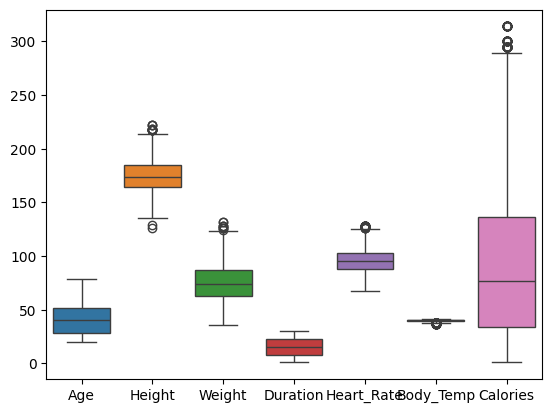

In [35]:
sns.boxplot(data=train)
plt.show()

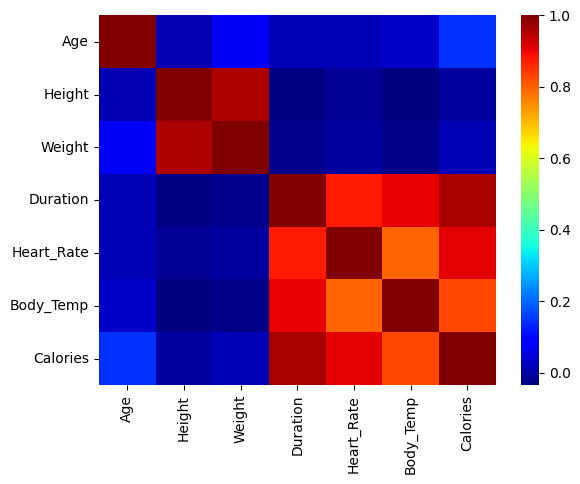

In [42]:
# multivariate analysis
sns.heatmap(data=train.select_dtypes(include=[np.number]).corr(), cmap='jet')
plt.show()

In [43]:
# categorical analysis
train.groupby(['Sex'])['Calories'].mean()

Sex
female    87.534761
male      89.033683
Name: Calories, dtype: float64

In [ ]:
gender_group = train.groupby('Sex')
gender_group.mean()


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Sex,,,,,,,
female,41.273650,165.022200,63.726300,15.501013,95.397955,40.048655,87.534761
male,41.567724,184.410448,86.609032,15.340708,95.570366,40.023803,89.033683


In [57]:
gender_group.std()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Sex,,,,,,,
female,15.386384,8.198525,7.011194,8.256757,9.406330,0.764397,57.905734
male,14.958469,8.589572,8.951300,8.449930,9.492556,0.794915,66.590171


C:\Users\Mohitraj\AppData\Local\Temp\ipykernel_12732\3381159224.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Mohitraj\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


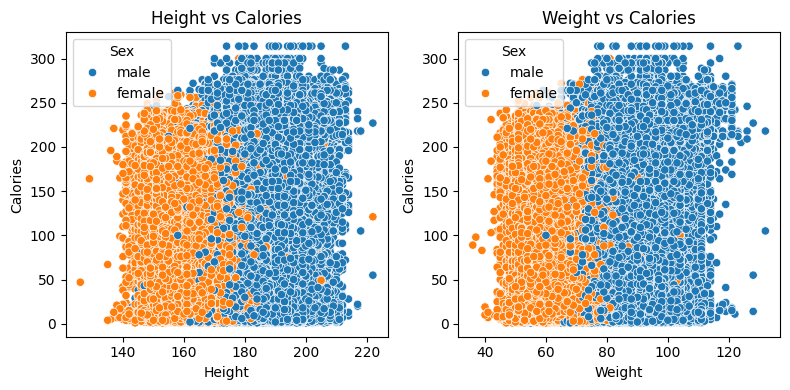

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.scatterplot(data=train, x='Height', y='Calories', hue='Sex', ax=ax[0])
sns.scatterplot(data=train, x='Weight', y='Calories', hue='Sex', ax=ax[1])


ax[0].set_title('Height vs Calories')
ax[1].set_title('Weight vs Calories')

plt.tight_layout()
plt.show()

C:\Users\Mohitraj\AppData\Local\Temp\ipykernel_12732\3657801740.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()  # Prevent overlap
c:\Users\Mohitraj\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


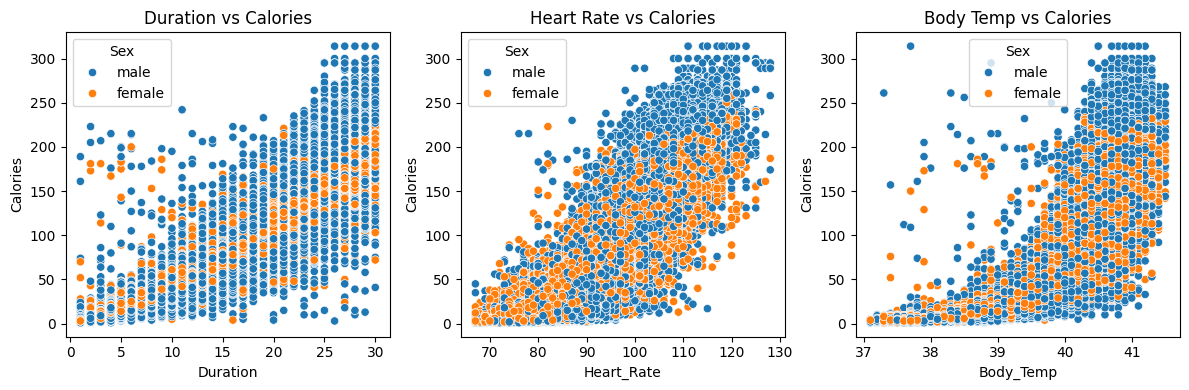

In [60]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.scatterplot(data=train, x='Duration', y='Calories', hue='Sex', ax=ax[0])
sns.scatterplot(data=train, x='Heart_Rate', y='Calories', hue='Sex', ax=ax[1])
sns.scatterplot(data=train, x='Body_Temp', y='Calories', hue='Sex', ax=ax[2])


ax[0].set_title('Duration vs Calories')
ax[1].set_title('Heart Rate vs Calories')
ax[2].set_title('Body Temp vs Calories')

plt.tight_layout()
plt.show()